In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# missing data

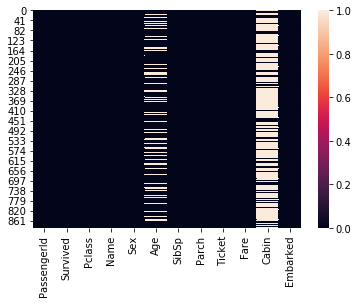

In [8]:
sns.heatmap(train.isnull())

In [37]:
# how many percent of Age data we are missing?
float(len(train[train['Age'].isnull()])) / float(len(train['Age']))

0.19865319865319866

In [159]:
# fill nulls with mean for Age
train.loc[train['Age'].isnull(), ['Age']] = train['Age'].mean()
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1,1,0,1
5,0,3,29.699118,0,0,8.4583,1,1,0,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0,0,0,0


In [64]:
sns.set_style('whitegrid')

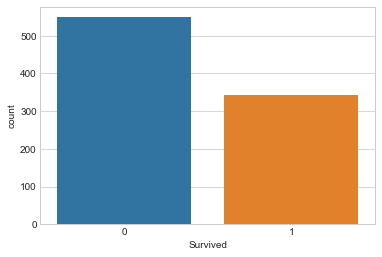

In [66]:
sns.countplot(x='Survived',data=train)

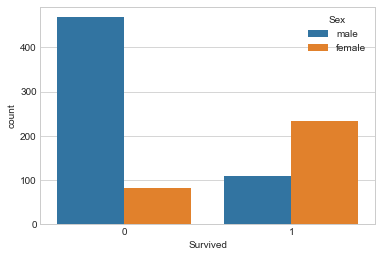

In [68]:
sns.countplot(x='Survived',data=train,hue='Sex')

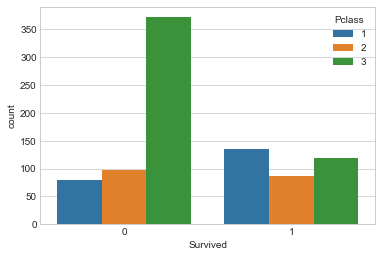

In [71]:
sns.countplot(x='Survived',data=train,hue='Pclass')

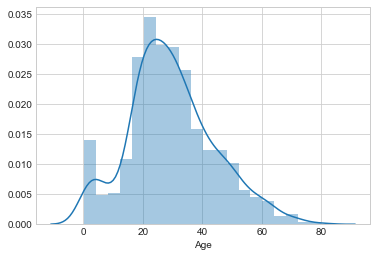

In [74]:
sns.distplot(train['Age'].dropna())

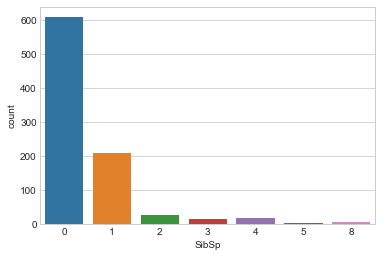

In [76]:
sns.countplot(x='SibSp',data=train)

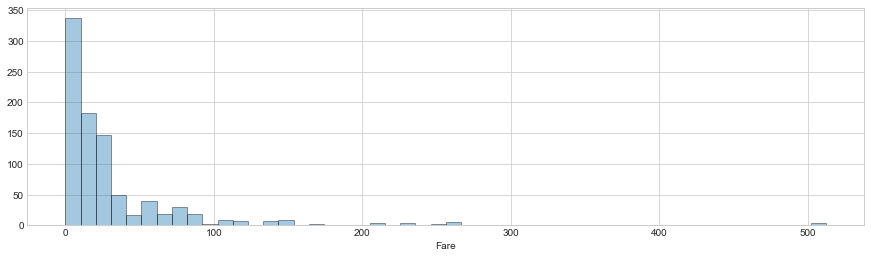

In [178]:
#train['Fare'].plot.hist()
plt.figure(figsize=(15,4))
sns.distplot(train['Fare'],kde=False,bins=50,hist_kws=dict(ec='k'))

In [87]:
######################
# data cleaning

In [88]:
# fill Age nulls with mean for Age

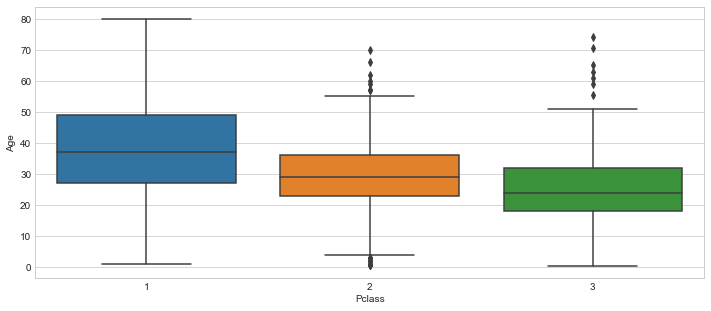

In [91]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Pclass',y='Age',data=train)

In [93]:
train['Age'] = train['Age_corrected']

In [124]:
# drop Cabin column
train.drop('Cabin',axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(6)
memory usage: 54.0 KB


In [100]:
# only one missing row left
train.dropna(inplace=True)

In [101]:
########################
# deal with categorical features > use dummy features instead

In [122]:
#pd.get_dummies(train['Sex']) # cant use because it can make our ml algorighm worse
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [126]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [130]:
train.drop('PassengerId',axis=1,inplace=True)

In [132]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [133]:
##################
# train and use model

In [134]:
# NOTE: normally we need to do the same cleaning on TEST set
# in this case we will split train set to (new) train and test

In [135]:
from sklearn.model_selection import train_test_split

In [160]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
lr = LogisticRegression()

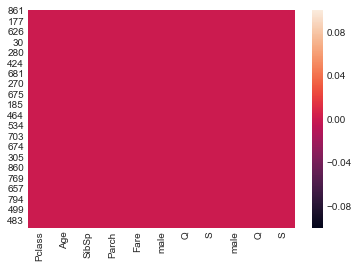

In [163]:
sns.heatmap(X_train.isnull())

In [165]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
predictions = lr.predict(X_test)

In [169]:
################
# model evaluation

In [171]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.83      0.82       167
          1       0.71      0.69      0.70       101

avg / total       0.78      0.78      0.78       268



In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(y_test,predictions)

array([[139,  28],
       [ 31,  70]])